<a href="https://colab.research.google.com/github/FadyEhab-coder/ML-Projects/blob/main/Gold_Price_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("franciscogcc/financial-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/financial-data


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/financial-data/financial_regression.csv


In [ ]:
df = pd.read_csv('/kaggle/input/financial-data/financial_regression.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [ ]:
df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


In [ ]:
df.isnull().sum()

,0
date,0
sp500 open,185
sp500 high,185
sp500 low,185
sp500 close,185
sp500 volume,185
sp500 high-low,185
nasdaq open,185
nasdaq high,185
nasdaq low,185


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
sp500 open,0
sp500 high,0
sp500 low,0
sp500 close,0
sp500 volume,0
sp500 high-low,0
nasdaq open,0
nasdaq high,0
nasdaq low,0


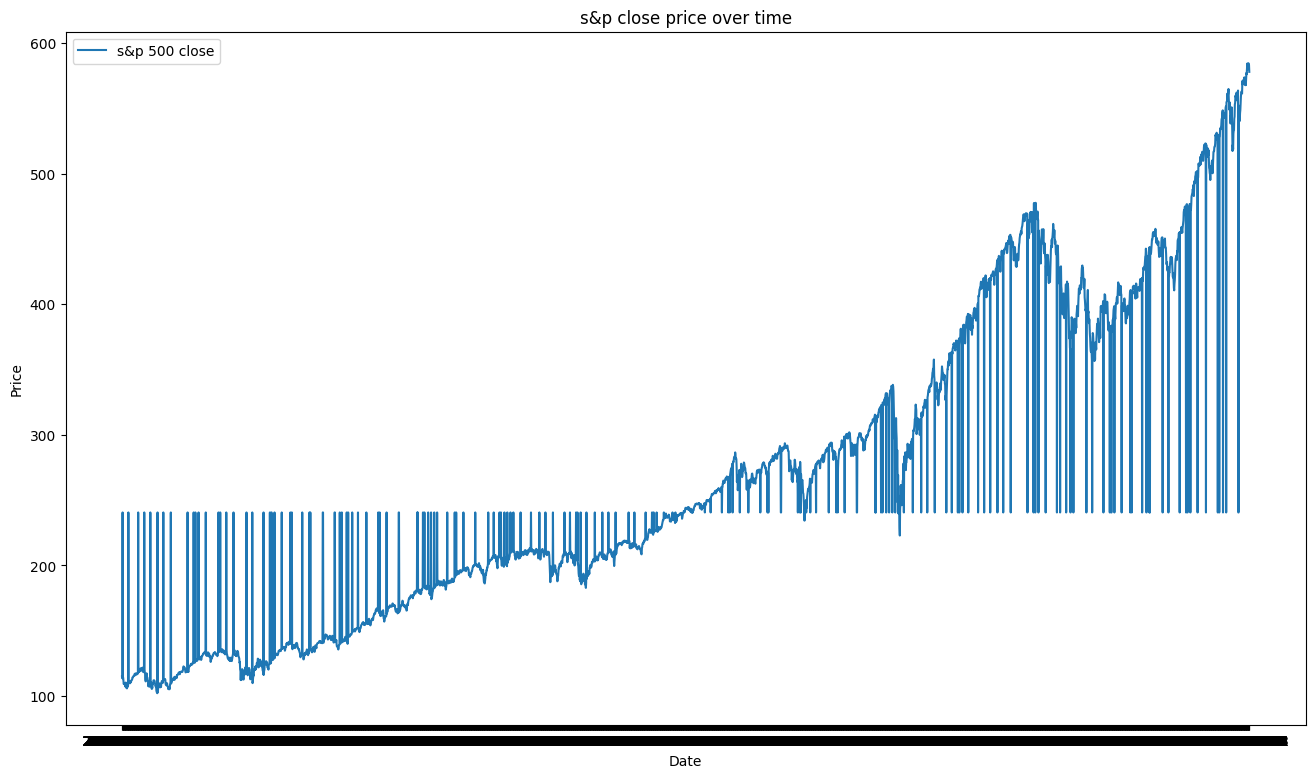

In [ ]:

plt.figure(figsize=(16, 9))
plt.plot(df['date'], df['sp500 close'], label='s&p 500 close')
plt.title('s&p close price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
x = df.drop(columns=['date', 'sp500 close'])
y = df['sp500 close']
x.head()

,sp500 open,sp500 high,sp500 low,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq volume,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,114.49,115.14,114.42,115646960.0,0.72,46.26,46.520,46.22,46.39,75209000.0,...,45.02,43.86,44.84,364528.0,1.160,111.51,112.37,110.79,112.03,18305238.0
1,114.73,114.84,113.20,212252769.0,1.64,46.46,46.550,45.65,45.85,126849300.0,...,45.76,44.40,45.76,442210.0,1.360,111.35,112.01,110.38,110.86,18000724.0
2,241.18,242.08,239.45,92399074.0,2.09,138.72,139.420,138.02,139.05,38973659.0,...,83.90,82.65,83.21,38295.0,1.414,137.62,138.14,136.99,137.71,8087993.0
3,113.62,115.13,113.59,138671890.0,1.54,45.96,46.640,45.95,46.59,84388200.0,...,47.08,45.70,46.94,629150.0,1.380,110.95,111.75,110.83,111.52,10467927.0
4,114.28,114.45,112.98,216330645.0,1.47,46.27,46.604,45.43,45.92,145680000.0,...,47.31,45.17,47.05,643198.0,2.140,109.97,110.05,108.46,108.94,17534231.0


In [ ]:
correlation_matrix = df.corr()
medv_correlation = correlation_matrix['sp500 close'].sort_values(ascending=False)

medv_correlation

,sp500 close
sp500 close,1.000000
sp500 low,0.999898
sp500 high,0.999880
sp500 open,0.999810
nasdaq close,0.991277
nasdaq low,0.991247
nasdaq high,0.991138
nasdaq open,0.991095
date,0.938075
nasdaq high-low,0.697284


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3123, 45), (781, 45), (3123,), (781,))

In [ ]:



models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor(random_state=42)

}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

for model_name, metrics in results.items():
    print(f"\n{model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10808
[LightGBM] [Info] Number of data points in the train set: 3123, number of used features: 45
[LightGBM] [Info] Start training from score 268.705578

Linear Regression
R2 Score: 1.0000
RMSE: 0.5305
MAE: 0.3403

Ridge Regression
R2 Score: 0.9999
RMSE: 1.0421
MAE: 0.6914

Lasso Regression
R2 Score: 0.9996
RMSE: 2.2494
MAE: 1.5693

Random Forest
R2 Score: 0.9999
RMSE: 1.4279
MAE: 0.8910

Gradient Boosting
R2 Score: 0.9998
RMSE: 1.7506
MAE: 1.1839

XGBoost
R2 Score: 0.9997
RMSE: 1.9256
MAE: 1.2667

LightGBM
R2 Score: 0.9998
RMSE: 1.5817
MAE: 1.0006

SVR
R2 Score: 0.9137
RMSE: 34.8782
MAE: 19.0900

Decision Tree
R2 Score: 0.9997
RMSE: 2.0341
MAE: 1.2443

K-Nearest Neighbors
R2 Score: 0.9968
RMSE: 6.7120
MAE: 4.3968

AdaBoost
R2 Score: 0.9964
RMSE: 7.0862
MAE: 5.4864


In [ ]:

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by=['R2 Score'], ascending=False)
results_df

,R2 Score,RMSE,MAE
Linear Regression,0.999980,0.530483,0.340278
Ridge Regression,0.999923,1.042080,0.691425
Random Forest,0.999855,1.427943,0.890997
LightGBM,0.999823,1.581706,1.000649
Gradient Boosting,0.999783,1.750574,1.183897
XGBoost,0.999737,1.925569,1.266679
Decision Tree,0.999706,2.034061,1.244302
Lasso Regression,0.999641,2.249446,1.569317
K-Nearest Neighbors,0.996804,6.711987,4.396784
AdaBoost,0.996437,7.086161,5.486422
